In [82]:
import pandas as pd

### **1.	Upload car evaluation dataset into the data-frame**

In [83]:
df = pd.read_csv('/content/car_evaluation.csv')

### **2.	Apply Data exploration steps.**

In [84]:
df.shape

(1728, 7)

In [85]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [86]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [87]:
print(df['buying'].unique())
print(df['maint'].unique())
print(df['doors'].unique())
print(df['persons'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())
print(df['class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


### **3.	Apply missing value treatment if required.**

not required

In [88]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### **5.	Apply ordinal encoder on columns like [‘buying’, ’maint’, ’doors’, ’persons’, ’lug_boot’, ’safety’]**

In [89]:
from sklearn.preprocessing import OrdinalEncoder

In [90]:
encoder = OrdinalEncoder()

In [91]:
encode_columns = df.loc[:, df.columns != 'class']
encode_columns.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [92]:
df[encode_columns.columns] = encoder.fit_transform(encode_columns)

In [93]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,unacc
1,3.0,3.0,0.0,0.0,2.0,2.0,unacc
2,3.0,3.0,0.0,0.0,2.0,0.0,unacc
3,3.0,3.0,0.0,0.0,1.0,1.0,unacc
4,3.0,3.0,0.0,0.0,1.0,2.0,unacc


### **4.	Split data set into train test at a ratio of 80- 20**

In [94]:
x = df.loc[:, df.columns != 'class']
y = df['class']

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### **6.	Apply Decision Tree classifier with criterion as ‘entropy’ and maximum depth of the tree as 3**

In [96]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [97]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### **7.	Predict class for test data set find accuracy of the model for test data set**

In [98]:
pred_test = dt.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, pred_test)

print('Accuracy for test data set:', accuracy_test)

Accuracy for test data set: 0.7630057803468208


### **8.	Predict class for train data set and find accuracy of the model for the train data set**

In [100]:
pred_train = dt.predict(x_train)

In [101]:
accuracy_train = accuracy_score(y_train, pred_train)

print('Accuracy for train data set:', accuracy_train)

Accuracy for train data set: 0.784370477568741


### **9.	Compare accuracy of train and test data set and comment on overfitting or under fitting of the model**

In [102]:
if accuracy_train > accuracy_test:
  print("The model is overfitting.")
elif accuracy_train < accuracy_test:
  print("The model is underfitting.")
else:
  print("The model is neither overfitting nor underfitting.")


The model is overfitting.


### **10.	Plot decision tree**

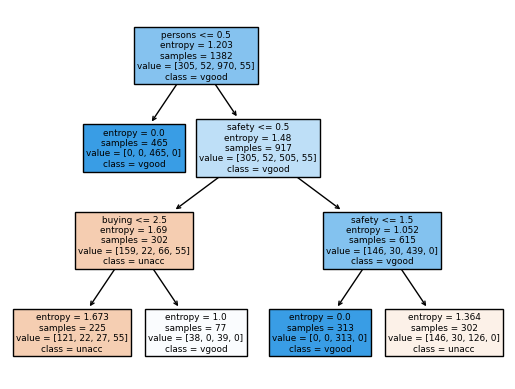

In [103]:
import matplotlib.pyplot as plt

tree.plot_tree(dt, feature_names=x_train.columns, class_names=df['class'].unique(), filled=True)
plt.show()

### **11.	Identify the number of pure partitions (leaf nodes) created. Comment on the entropy of pure partitions.**

In [104]:
print("Number of pure partitions (leaf nodes):", dt.get_n_leaves())

Number of pure partitions (leaf nodes): 5


### **12.	Plot decision tree using graphviz library.  Which attribute is selected as root node?**

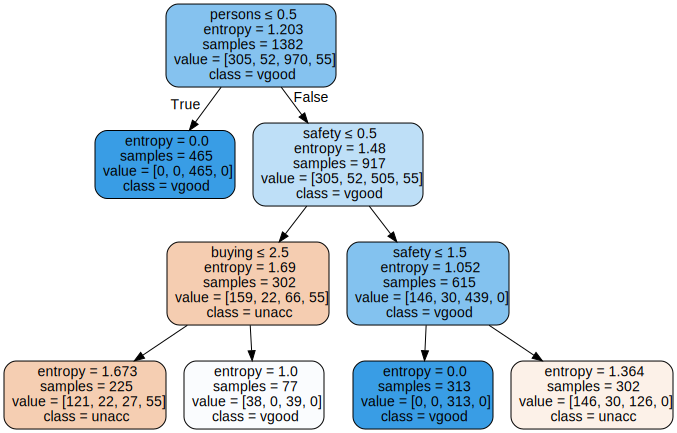

In [108]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=x_train.columns, class_names=df['class'].unique(), filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)

### **13.	Plot the confusion matrix for test data set**

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_test)

print(cm)

[[ 71   0   8   0]
 [ 17   0   0   0]
 [ 47   0 193   0]
 [ 10   0   0   0]]


### **14.	Plot the classification report for the test data set. Comment your observation for classification report**

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         acc       0.49      0.90      0.63        79
        good       0.00      0.00      0.00        17
       unacc       0.96      0.80      0.88       240
       vgood       0.00      0.00      0.00        10

    accuracy                           0.76       346
   macro avg       0.36      0.43      0.38       346
weighted avg       0.78      0.76      0.75       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
